# Introduction into regression analysis

In pattern recognition problem we have

$Y \in D_Y = \{w_1, ... , w_k\}$

is a set of unordered values, i.e. $Y$ - a qualitative variable

**Regression analysis**: $Y \in R$ is a real-valued variable.

Random samples of objects $ \{ o^{(1)}, ... , o^{(N)}\}$

Set of variables $X_1, ... , X_n$

Data table $ x^{(i)}_j = X_j(o^{(i)}),\space j = 1, ... , n; y^{(i)}=Y(o^{(i)}) \space i = 1, ... , N $

Purpose of analysis is to predict values of variable $Y$ depending on values $X$ for any new object by minimizing some expected loss $L(y_{pred}, y_{real})$

Usually we use OLS (ordinary least squares) loss function : $L(y_{pred}, y_{real}) = (y_{pred} - y_{real})^2$

## Approaches for regression:
* Parametric models
* Non-parametric
* SVM
* Logical rules (regression trees)
* ...


Our linear model will look like:
$$ Y^{(i)} = \beta_0 + \beta_1x^{(i)}_1 + ... + \beta_nx^{(i)}_n + \epsilon^{(i)} $$

$ \epsilon $ - is supposed to be $N(0, \sigma)$, $\epsilon^{(i)}$ and $\epsilon^{(i)}$ are supposed to be independent for $i \neq j $

in matrix form:
**$$ Y = X\beta +  \epsilon $$**

# Examples of regression implementations (OLS)

* scikit-learn - easier to use
* statsmodel - provide stats out of the box (easier to perform statistical tests, and build confidence intervals), but interfaces are a bit harder
* tensorflow - we build linear regression with that library just to grasp a concept of computational graphs and SGD optimization


Coefficients: 
 [ 938.23786125] 152.918861826
Mean squared error: 2548.07
Variance score: 0.47


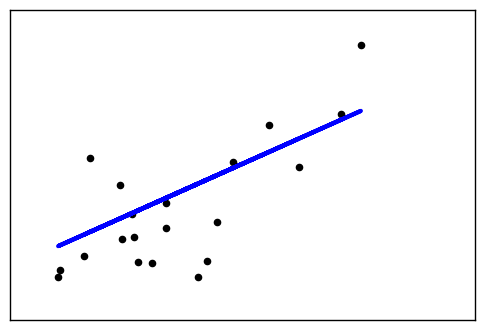

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
%matplotlib inline

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# The coefficients
print('Coefficients: \n', regr.coef_, regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(diabetes_X_test, diabetes_y_test))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


# Tensorflow linear regression 
You can install it with:
```sh
pip install tensorflow
```
Our model will be small, so it should work fine with CPU.

Tensorflow tl;dr 

First you need to create computational graph with those functions

[tf.placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) - reserve place for input

[tf.Variable](https://www.tensorflow.org/api_docs/python/tf/Variable) - parameters that you will optimize

tf.add, tf.multiply ... - operations (node of the computational graph) [Read the docs](https://www.tensorflow.org/api_docs/python/tf)

Define:
1. Cost function - it is also the same computational node (`cost` in example bellow)
2. create Optimizer 

When you have finished to creat your computational graph, you need to create Session -> Initialize variables -> Run optimizer/


Epoch: 0050 cost= 0.117614448 W= 0.362385 b= -0.0099495
Epoch: 0100 cost= 0.112916566 W= 0.355677 b= 0.0383092
Epoch: 0150 cost= 0.108761437 W= 0.349368 b= 0.0836979
Epoch: 0200 cost= 0.105086386 W= 0.343434 b= 0.126387
Epoch: 0250 cost= 0.101835981 W= 0.337853 b= 0.166537
Epoch: 0300 cost= 0.098961174 W= 0.332603 b= 0.204299
Epoch: 0350 cost= 0.096418560 W= 0.327666 b= 0.239816
Epoch: 0400 cost= 0.094169848 W= 0.323023 b= 0.27322
Epoch: 0450 cost= 0.092181012 W= 0.318656 b= 0.304638
Epoch: 0500 cost= 0.090422124 W= 0.314548 b= 0.334186
Epoch: 0550 cost= 0.088866554 W= 0.310685 b= 0.361978
Epoch: 0600 cost= 0.087490827 W= 0.307052 b= 0.388116
Epoch: 0650 cost= 0.086274229 W= 0.303635 b= 0.4127
Epoch: 0700 cost= 0.085198283 W= 0.300421 b= 0.435822
Epoch: 0750 cost= 0.084246777 W= 0.297397 b= 0.457568
Epoch: 0800 cost= 0.083405353 W= 0.294554 b= 0.478022
Epoch: 0850 cost= 0.082661286 W= 0.29188 b= 0.497258
Epoch: 0900 cost= 0.082003325 W= 0.289365 b= 0.51535
Epoch: 0950 cost= 0.081421502

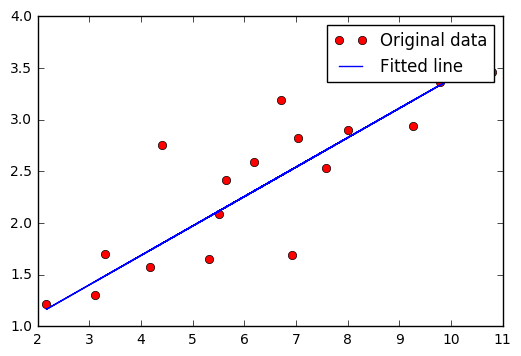

Testing... (Mean square loss Comparison)
Testing cost= 0.0764927
Absolute mean square loss difference: 0.00441433


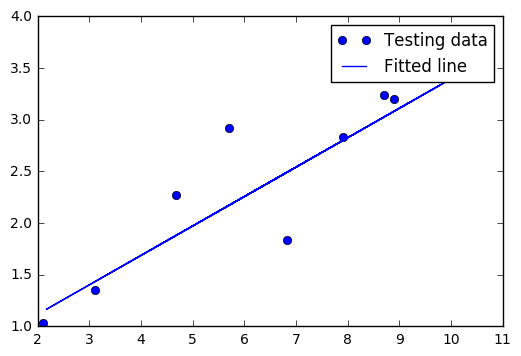

In [2]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()


# Task:
1. download dataset from https://www.kaggle.com/harlfoxem/housesalesprediction, make train, test datasets
2. build linear regression  using `sqft_living` or `sqft_lot` of house age features 
3. build these regression models using different libraries (sklearn, statsmodel, tensorflow)
4. compare models using $R^2$, $R^2_{adj}$ and RMSE 

Reading our data:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [66]:
target = data['price']
dataset = data['sqft_living']
X_train, X_test, y_train, y_test = train_test_split(dataset.values, target.values, random_state = 45, test_size=0.4)

### Sklearn

In [67]:
X_train_sk, X_test_sk, y_train_sk, y_test_sk = X_train.reshape(-1,1), X_test.reshape(-1,1), y_train.reshape(-1,1), y_test.reshape(-1,1)
regr = linear_model.LinearRegression()
regr.fit(X_train_sk, y_train_sk)
y_pred_sk = regr.predict(X_test_sk) 
print(y_pred_sk)
regr.score(X_test_sk,y_test_sk)

[[ 712204.81992857]
 [ 392067.0888578 ]
 [ 714941.03985225]
 ..., 
 [ 771580.79227246]
 [ 444055.26740776]
 [ 536539.5008282 ]]


0.5041346604566429

### Statistic Model

In [68]:
import copy
X_train_sm, X_test_sm, y_train_sm, y_test_sm = X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()
X_train_sm = sm.add_constant(X_train_sm, prepend=False)
X_test_sm  = sm.add_constant(X_test_sm, prepend=False)
mod_sm = sm.OLS(y_train_sm, X_train_sm)
res_sm = mod_sm.fit()

y_pred_sm = res_sm.predict(X_test_sm)
print(res_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                 1.215e+04
Date:                Tue, 23 May 2017   Prob (F-statistic):               0.00
Time:                        13:05:15   Log-Likelihood:            -1.7992e+05
No. Observations:               12967   AIC:                         3.598e+05
Df Residuals:                   12965   BIC:                         3.599e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           273.6220      2.482    110.224      0.0

### Tensorflow

Epoch: 0020 cost= 33054769152.000000000 W= 261.785 b= 1.28093
Epoch: 0040 cost= 33054754816.000000000 W= 261.793 b= 1.27158
Epoch: 0060 cost= 33054754816.000000000 W= 261.793 b= 1.26223
Epoch: 0080 cost= 33054754816.000000000 W= 261.793 b= 1.25288
Optimization Finished!
Training cost= 3.30548e+10 W= 261.793 b= 1.25288 



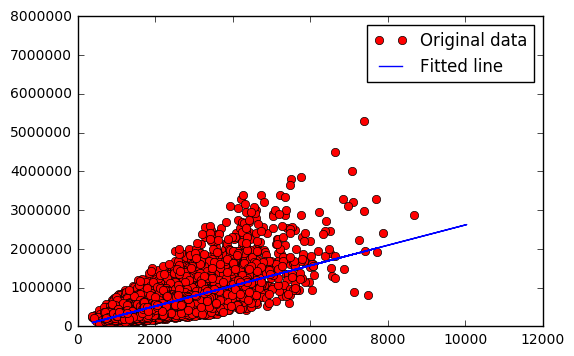

Testing... (Mean square loss Comparison)
Testing cost= 3.62549e+10
Absolute mean square loss difference: 3.20018e+09


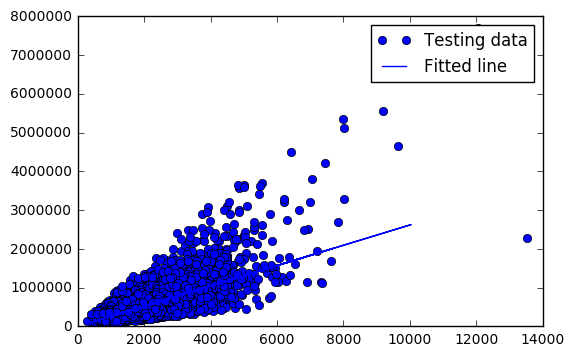

In [78]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 1e-7
training_epochs = 80
display_step = 20

# Training Data
train_X, test_X, train_Y, test_Y = train_test_split(dataset, target, random_state = 45, test_size=0.4)
#train_X, train_Y = np.array(train_X),np.array(train_Y)
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    y_pred_tf = sess.run(W) * test_X + sess.run(b)


### Computing Metrics

In [70]:
metrics_table = pd.DataFrame(index = ('R2','R2adj','RMSE'), columns = ('sklearn','sm','tf'))

def RMSE(predict, initial):
    return np.sqrt(np.mean((predict-initial)**2))
#sklearn
r = []
r.append(regr.score(X_test_sk,y_test_sk))
r.append(r[0] - (1.-r[0])/(y_test.shape[0] - 2.))
r.append(RMSE(y_pred_sk, y_test_sk))
metrics_table['sklearn'] = r
#sm
r = []
r.append(res_sm.rsquared)
r.append(res_sm.rsquared_adj)
r.append(RMSE(y_pred_sm, y_test_sm))
metrics_table['sm'] = r
metrics_table
#tf
r = []
r.append(np.dot(y_pred_tf - np.mean(y_test), y_pred_tf - np.mean(y_test))/np.dot(y_test - np.mean(y_test), y_test - np.mean(y_test)))
r.append(r[0] - (1.-r[0])/(y_test.shape[0] - 2.))
r.append(RMSE(y_pred_tf, y_test))
metrics_table['tf'] = r
metrics_table

,sklearn,sm,tf
R2,0.504135,0.483763,0.410679
R2adj,0.504077,0.483723,0.410611
RMSE,268371.456194,268371.456194,269276.510172


We can see that these algorithms are not very good. Sklearn shows the best results, but sm is not so far behind. Tensorflow showed the worst results, but I don't think they are very different, because it could be probably reach the same number by tweaking epochs or learning rate. RSME corresponds to calculated metrics. Also $R^2$, $R^2_{adj}$ are not really different.

# Categorical variables

Task:
1. Answer the questions:
    - What is a categorical variables?
    - Which features from the house sales dataset are categical?
    - How can you make model using these features?

**What is a categorical variable?** It is a variable that can take on one of the finite, usually fixed number of values. Assings objects to a certain group (category).

**Which features from the house sales dataset are categorical?** Floors, waterfront, view, condition, zipcode

**How can you make model using these features?** If a categorical value has more than two different values, then bring new, so-called dichotomous variables instead of a categorical one. If a categorical value has n levels (n different values), it can be splitted into n-1 variables with 2 values. E.g. for a condition variable we can introduce variables that were denoted as 'bad','average','good' and 'excellent' and the values would be (0 0 0 0 - awful (1), 1 0 0 0 - bad (2), 0 1 0 0 - average (3) , 0 0 1 0 - good (4), 0 0 0 1 - excellent (5)). Dichotomouse variables can be introduced into a model: The regression weight is added or subtracted to the prdeicted value of Y depending upon whether it is positive or negative.

## Regularization

Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them towards zero. It tends to reduce variance more than it increases bias, and thus minimizes overfitting.

Common regularization techniques for linear models:

- **Ridge regression** (also known as "L2 regularization"): shrinks coefficients toward zero (but they never reach zero)
- **Lasso regularization** (also known as "L1 regularization"): shrinks coefficients all the way to zero
- **ElasticNet regularization**: balance between Ridge and Lasso

Lasso regularization is useful if we believe many features are irrelevant, since a feature with a zero coefficient is essentially removed from the model. Thus, it is a useful technique for feature selection.

How does regularization work?

- A tuning parameter alpha (or sometimes lambda) imposes a penalty on the size of coefficients.
- Instead of minimizing the "loss function" (mean squared error), it minimizes the "loss plus penalty".
- A tiny alpha imposes no penalty on the coefficient size, and is equivalent to a normal linear model.
- Increasing the alpha penalizes the coefficients and shrinks them toward zero.


![reg_picture](https://qph.ec.quoracdn.net/main-qimg-2a88e2acc009fa4de3edeb51e683ca02)


Task:
1. Build crosscorrelation table for features
2. Fit linear regression model using at least 2 highly correlated features
3. Plot values of regrssion coefficients as a function of regularization parameter $\alpha$ for LASSO and RIDGE models. [example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html#sphx-glr-auto-examples-linear-model-plot-ridge-path-py)

### 1. Build crosscorrelation table for features

I've picked max values regarding correlation and we can see here that first two values are the same, which means sqft_above and sqft_living are highly correlated with each other.

In [38]:
corr = data.corr()
np.fill_diagonal(corr.values, 0)
corr.max().sort_values(ascending = False)

sqft_above       0.876597
sqft_living      0.876597
grade            0.762704
sqft_living15    0.756420
bathrooms        0.754665
sqft_lot         0.718557
sqft_lot15       0.718557
price            0.702035
bedrooms         0.576671
floors           0.523885
yr_built         0.506019
sqft_basement    0.435043
long             0.409356
view             0.401857
waterfront       0.401857
lat              0.307003
zipcode          0.267048
condition        0.174105
yr_renovated     0.126434
id               0.021380
dtype: float64

In [43]:
dataset = data[['sqft_living','sqft_above']]

[[ 705523.85827579]
 [ 389217.54488363]
 [ 708227.33103982]
 ..., 
 [ 764189.21725536]
 [ 440583.52740031]
 [ 531960.90682471]]


0.50467602252097776

### Ridge and Lasso, following the example

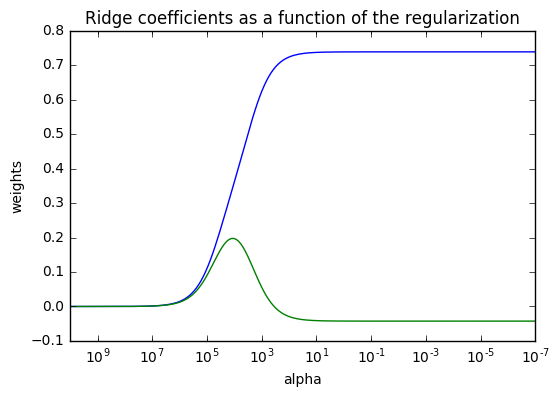

In [56]:
from sklearn import preprocessing as pr

X = pr.scale(dataset)
y = pr.scale(target)

n_alphas = 200
alphas = np.logspace(10, -7,  n_alphas)
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.ylim([-0.1,0.8])
plt.show()    

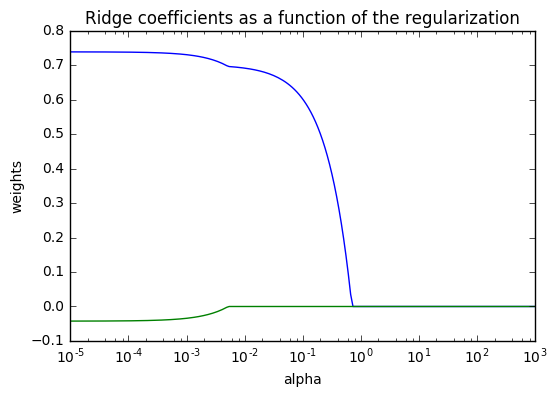

In [57]:
from sklearn import preprocessing as pr

alphas = np.logspace(3, -5,  n_alphas)
clf = linear_model.Lasso(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.ylim([-0.1,0.8])
plt.show()    

For Ride and Lasso regularization behaviour is usual - with increasing a the solution tends to zero. But also noticeable that sqft_living (the blue line) coefficients have much more "weight" in a decision and weight as it is.

# Regression trees 

Task:
1. try `sklearn.tree.DecisionTreeRegressor`
2. compare models using $R^2$, $R^2_{adj}$ and RMSE 


In [71]:
from sklearn.tree import DecisionTreeRegressor

target = data['price']
dataset = data['sqft_living']
X_train_tr, X_test_tr, y_train_tr, y_test_tr = X_train_sk.copy(), X_test_sk.copy(), y_train_sk.copy(), y_test_sk.copy()

regr_tr = DecisionTreeRegressor()
regr_tr.fit(X_train_tr,y_train_tr)
y_pred_tr = regr_tr.predict(X_test_tr)

In [77]:
r = []
r.append(regr_tr.score(X_test_tr,y_test_tr))
r.append(r[0] - (1.-r[0])/(y_test.shape[0] - 2.))
r.append(RMSE(y_pred_tr, y_test))
metrics_table['tree'] = r
metrics_table

,sklearn,sm,tf,tree
R2,0.504135,0.483763,0.410679,0.486711
R2adj,0.504077,0.483723,0.410611,0.486652
RMSE,268371.456194,268371.456194,269276.510172,273045.774875


Tree's is on the same level with sklearn and sm.

# XGBoost regressor 
I have mentioned it here only for you to know about the existence of that model

### Is it legit?

In [ ]:
import statsmodels.formula.api as smf

sm = smf.ols('sqft_living ~ price', data=data)
result = sm.fit()
print(result.summary())

y_pred_sm = sm.predict(data.price.values)